In [5]:
pip install --user imblearn

Note: you may need to restart the kernel to use updated packages.


# Importing Required Modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
data = pd.read_csv('C:\\Users\\akhila\\OneDrive\\Desktop\\codsoft\\Churn_Modelling.csv')
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


# Preprocessing of Data¶

In [13]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
# Convert categorical variables to numerical using label encoding
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
# Split the data into features (X) and target (y)
X = data.drop('Exited', axis=1)
y = data['Exited']
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

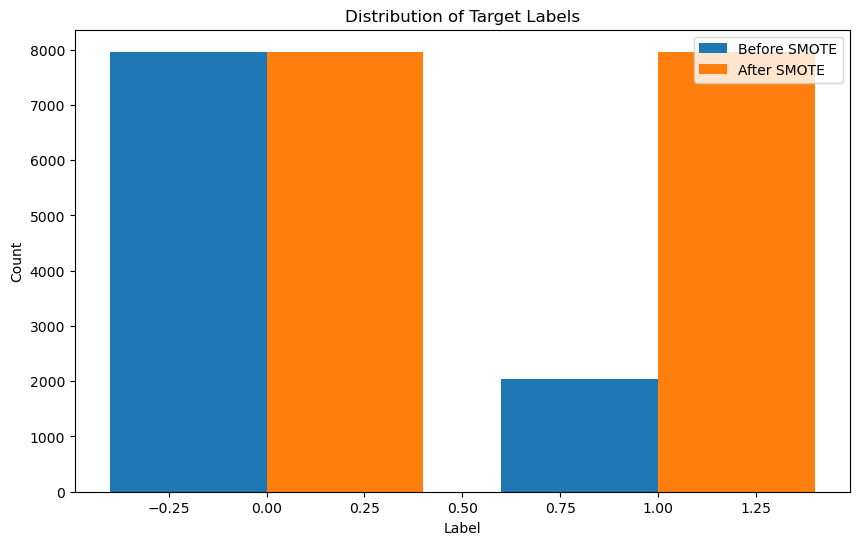

In [29]:
# Create a grouped bar chart to compare counts before and after SMOTE
plt.figure(figsize=(10, 6))
width = 0.4

plt.bar(class_counts_before.index - width/2, class_counts_before.values, width, label='Before SMOTE')
plt.bar(class_counts_after.index + width/2, class_counts_after.values, width, label='After SMOTE')

plt.title('Distribution of Target Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.legend()
plt.show()



# Training and Testing

In [16]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2,random_state=42)
# Initialize the Gradient Boosting model
best_gb_model = GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=300)
best_gb_model.fit(X_train, y_train)
# Make predictions on the test set
gb_preds = best_gb_model.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_preds))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, gb_preds))

Gradient Boosting Accuracy: 0.8691148775894538
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      1633
           1       0.86      0.88      0.87      1553

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186



<Figure size 1200x600 with 0 Axes>

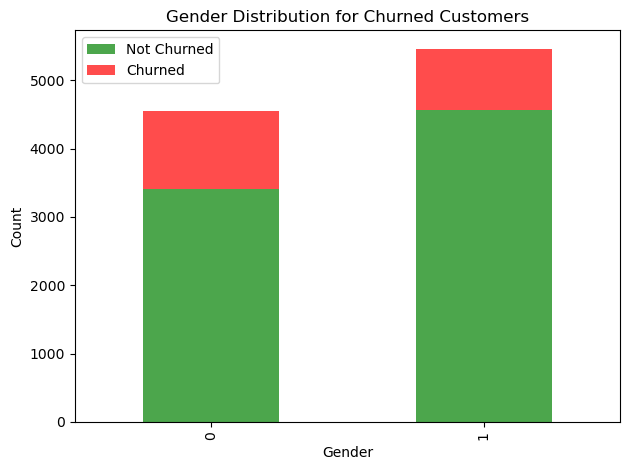

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a crosstab to calculate the counts
cross_tab_geo = pd.crosstab(data['Geography'], data['Exited'])
cross_tab_gender = pd.crosstab(data['Gender'], data['Exited'])

# Plot stacked bar charts for Geography and Gender
plt.figure(figsize=(12, 6))


cross_tab_gender.plot(kind='bar', stacked=True, color=['green', 'red'], alpha=0.7)
plt.title('Gender Distribution for Churned Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['Not Churned', 'Churned'])

plt.tight_layout()
plt.show()


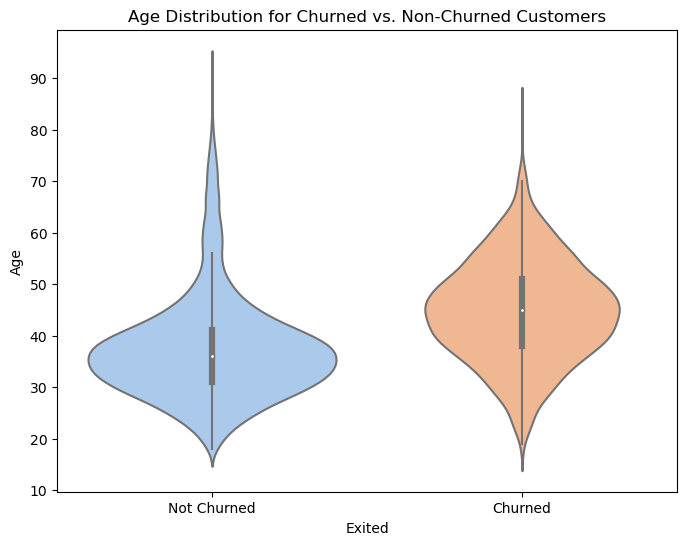

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a violin plot for Age distribution
plt.figure(figsize=(8, 6))
sns.violinplot(x='Exited', y='Age', data=data, palette='pastel')
plt.title('Age Distribution for Churned vs. Non-Churned Customers')
plt.xlabel('Exited')
plt.ylabel('Age')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()


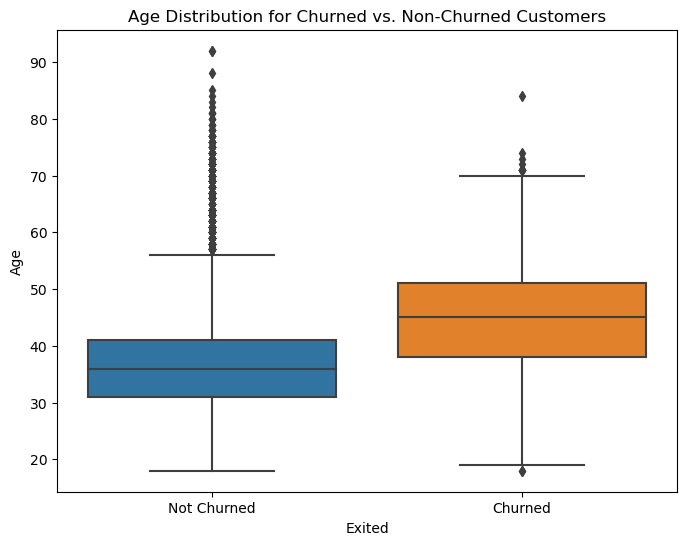

In [19]:
# Visualize the distribution of Age for churned and non-churned customers
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='Age', data=data)
plt.title('Age Distribution for Churned vs. Non-Churned Customers')
plt.xlabel('Exited')
plt.ylabel('Age')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

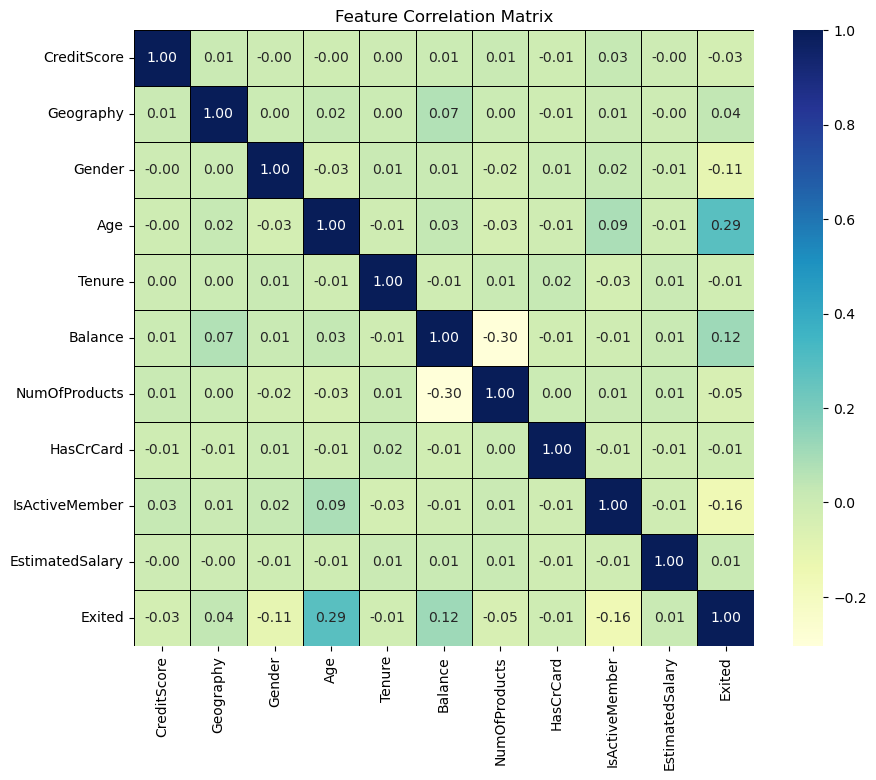

In [28]:
# Visualize the correlation matrix of features with modified colors
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', linewidths=0.5, linecolor='black', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()
